In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datasets/DadesAtencioPrimaria.csv', sep=';')
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d').dt.strftime('%d/%m/%Y')

df.head()

,data,setmana_epidemiologica,any,codi_regio,nom_regio,codi_ambit,nom_ambit,codi_abs,nom_abs,diagnostic,sexe,grup_edat,index_socioeconomic,casos,poblacio
0,01/10/2024,40,2024,61,Lleida,61,Lleida,329,Lleida rural - 2 Sud,Altres IRA,Dona,75 a 79,3,1,170
1,01/10/2024,40,2024,64,Girona,64,Girona,267,Vilafant,Altres IRA,Home,3 i 4,3,1,130
2,01/10/2024,40,2024,67,Catalunya Central,67,Catalunya Central,146,Manresa - 2,Bronquiolitis,Dona,0,3,1,82
3,01/10/2024,40,2024,75,Barcelona Metropolitana Sud,75,Barcelona Metropolitana Sud,203,Sant Boi de Llobregat - 2,Altres IRA,Home,0,3,1,62
4,01/10/2024,40,2024,75,Barcelona Metropolitana Sud,75,Barcelona Metropolitana Sud,295,L'Hospitalet de Llobregat - 08 Florida Sud,Faringoamigdalitis,Dona,5 a 9,4,2,546


In [11]:
df.describe()

,setmana_epidemiologica,any,codi_regio,codi_ambit,codi_abs,index_socioeconomic,casos,poblacio
count,397576.000000,397576.0,397576.000000,397576.000000,397576.000000,397576.000000,397576.000000,397576.000000
mean,44.148945,2024.0,71.943226,71.943226,207.493320,2.907771,1.222544,665.019893
std,2.596504,0.0,6.298918,6.298918,116.780795,0.899086,0.547666,381.653726
min,40.000000,2024.0,61.000000,61.000000,1.000000,-1.000000,1.000000,4.000000
25%,42.000000,2024.0,64.000000,64.000000,109.000000,3.000000,1.000000,380.000000
50%,44.000000,2024.0,75.000000,75.000000,208.000000,3.000000,1.000000,629.000000
75%,46.000000,2024.0,76.000000,76.000000,306.000000,3.000000,1.000000,902.000000
max,48.000000,2024.0,79.000000,79.000000,409.000000,4.000000,13.000000,2427.000000


In [4]:
#df.value_counts('casos')
df.value_counts('grup_edat')

grup_edat
5 a 9       35815
10 a 14     25444
15 a 19     24838
20 a 24     23921
1 i 2       23578
40 a 44     22750
35 a 39     22696
80 o més    22463
25 a 29     22324
30 a 34     22176
45 a 49     22137
3 i 4       21077
50 a 54     19171
55 a 59     17521
60 a 64     16315
65 a 69     15046
70 a 74     13961
75 a 79     13905
0           12438
Name: count, dtype: int64

01/10/2024
31/10/2024


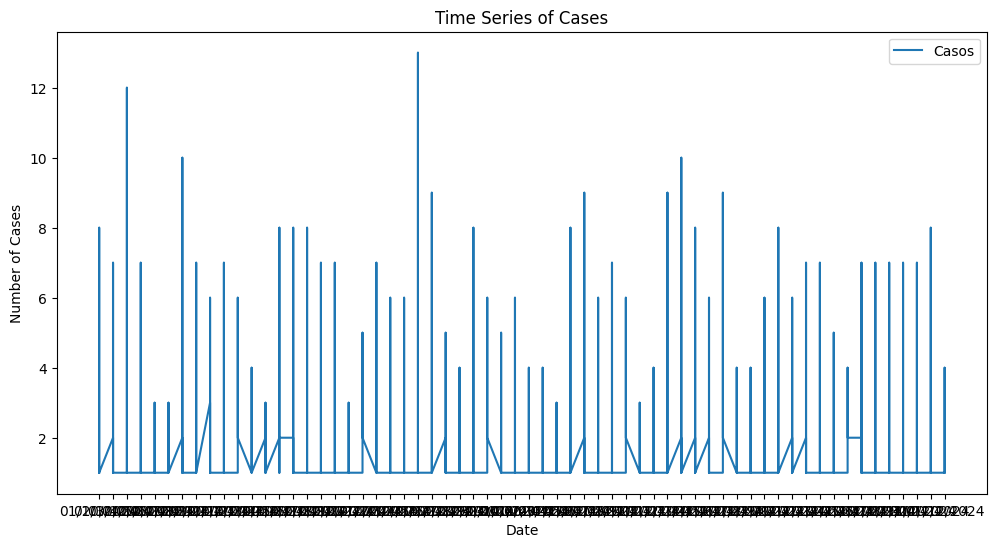

In [5]:
print(df['data'].min())
print(df['data'].max())
# Convert 'data' column to datetime

# Plot time series of the data
plt.figure(figsize=(12, 6))
plt.plot(df['data'], df['casos'], label='Casos')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Time Series of Cases')
plt.legend()
plt.show()

01/10/2024
31/10/2024


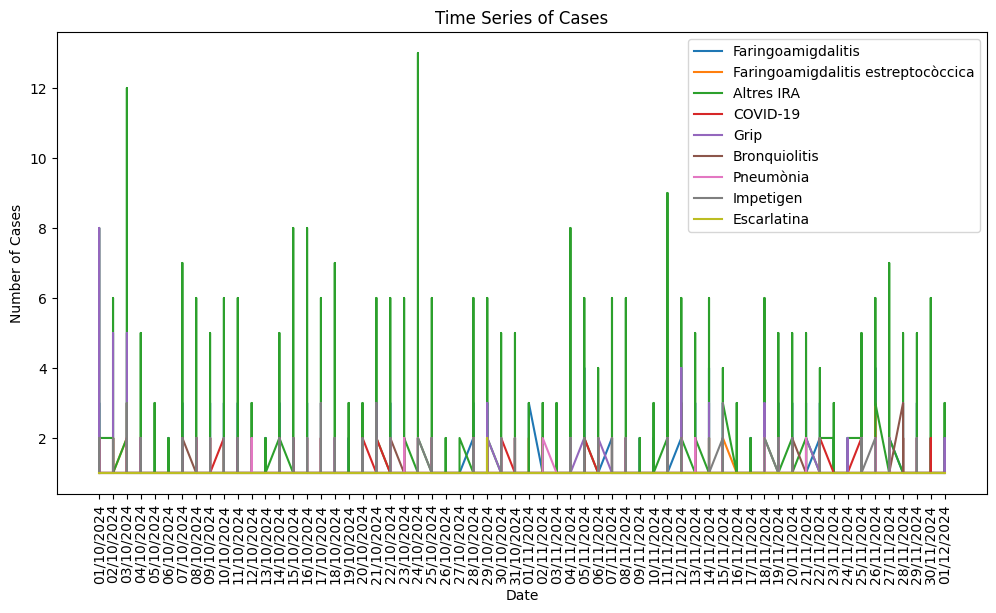

In [10]:
print(df['data'].min())
print(df['data'].max())
# Convert 'data' column to datetime

df_bcn = df[df['nom_regio'] == 'Barcelona Ciutat']

# Plot time series of the data
plt.figure(figsize=(12, 6))
for diagnostic in df_bcn['diagnostic'].unique():
    plt.plot(df_bcn[df_bcn['diagnostic'] == diagnostic]['data'], 
             df_bcn[df_bcn['diagnostic'] == diagnostic]['casos'], 
             label=diagnostic)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Time Series of Cases')
plt.legend()
plt.xticks(rotation=90)
plt.show()